In [1]:
# Import useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

import joblib

pd.set_option('display.max_columns', None)

#### 1. DATA SET

In [2]:
# loading the dataset
data = pd.read_csv('data/students_dataset.csv')
data

,Student_ID,SS1_avg_attendance,SS2_avg_attendance,SS3_avg_attendance,Access_to_Technology,Extracurricular_Activities,Private_Home_Tutor,Avg_Daily_Study_Hours,Education_Level,Socioeconomic_Status,Marriage_Status,SS1_First_Term,SS1_Second_Term,SS1_Third_Term,SS2_First_Term,SS2_Second_Term,SS2_Third_Term,SS3_First_Term,SS3_Second_Term
0,STD001,79.643333,81.256667,94.183333,No,Yes,No,4.6,BSc,High,Married,83.222222,69.333333,76.444444,66.333333,62.666667,71.888889,60.000000,71.888889
1,STD002,85.543333,92.526667,80.306667,Yes,Yes,No,2.3,Secondary School,High,Single,70.000000,69.777778,63.000000,61.333333,69.000000,70.444444,77.222222,65.333333
2,STD003,89.803333,96.533333,95.326667,Yes,Yes,Yes,1.6,PhD,Middle,Divorced,70.444444,63.000000,75.444444,77.222222,78.777778,71.000000,70.333333,75.000000
3,STD004,83.196667,87.236667,89.503333,No,Yes,Yes,4.8,PhD,Middle,Divorced,74.666667,84.555556,70.666667,68.222222,67.222222,68.000000,77.555556,60.222222
4,STD005,86.646667,84.816667,82.133333,Yes,No,No,1.1,Secondary School,Low,Divorced,72.250000,76.375000,65.250000,69.125000,82.875000,73.750000,71.125000,79.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,STD156,89.073333,89.440000,87.676667,Yes,Yes,No,3.6,Primary School,Middle,Divorced,69.875000,60.125000,72.750000,65.250000,67.000000,73.500000,72.000000,72.250000
156,STD157,84.186667,89.173333,89.023333,Yes,Yes,Yes,4.0,MSc,Low,Married,67.625000,68.500000,70.000000,69.000000,73.000000,69.750000,59.375000,69.500000
157,STD158,79.513333,84.543333,90.240000,Yes,No,No,1.7,BSc,Low,Married,78.000000,73.000000,76.000000,74.222222,74.888889,53.888889,61.222222,72.777778
158,STD159,94.403333,84.183333,88.586667,Yes,No,Yes,2.4,BSc,Low,Single,65.888889,68.111111,67.888889,66.222222,58.111111,67.111111,70.111111,75.000000


In [3]:
#introducing our target variable: SS3_Second_Term

# Custom function for rounding based on the rule
def round_custom(x):
    if x % 1 >= 0.5:
        return np.floor(x) + 1  # Round up
    else:
        return np.floor(x)       # Round down. remains the same

# Apply the custom rounding function to each column
data['SS3_Second_Term'] = data['SS3_Second_Term'].apply(round_custom)

# Display the first few rows to verify the results
data.head()

,Student_ID,SS1_avg_attendance,SS2_avg_attendance,SS3_avg_attendance,Access_to_Technology,Extracurricular_Activities,Private_Home_Tutor,Avg_Daily_Study_Hours,Education_Level,Socioeconomic_Status,Marriage_Status,SS1_First_Term,SS1_Second_Term,SS1_Third_Term,SS2_First_Term,SS2_Second_Term,SS2_Third_Term,SS3_First_Term,SS3_Second_Term
0,STD001,79.643333,81.256667,94.183333,No,Yes,No,4.6,BSc,High,Married,83.222222,69.333333,76.444444,66.333333,62.666667,71.888889,60.000000,72.0
1,STD002,85.543333,92.526667,80.306667,Yes,Yes,No,2.3,Secondary School,High,Single,70.000000,69.777778,63.000000,61.333333,69.000000,70.444444,77.222222,65.0
2,STD003,89.803333,96.533333,95.326667,Yes,Yes,Yes,1.6,PhD,Middle,Divorced,70.444444,63.000000,75.444444,77.222222,78.777778,71.000000,70.333333,75.0
3,STD004,83.196667,87.236667,89.503333,No,Yes,Yes,4.8,PhD,Middle,Divorced,74.666667,84.555556,70.666667,68.222222,67.222222,68.000000,77.555556,60.0
4,STD005,86.646667,84.816667,82.133333,Yes,No,No,1.1,Secondary School,Low,Divorced,72.250000,76.375000,65.250000,69.125000,82.875000,73.750000,71.125000,80.0


In [4]:
#classifying target variable according to WAEC standard
def classify_grade(score):
    if 75 <= score <= 100:
        return 'A1'
    elif 70 <= score <= 74:
        return 'B2'
    elif 65 <= score <= 69:
        return 'B3'
    elif 60 <= score <= 64:
        return 'C4'
    elif 55 <= score <= 59:
        return 'C5'
    elif 50 <= score <= 54:
        return 'C6'
    elif 45 <= score <= 49:
        return 'D7'
    elif 40 <= score <= 44:
        return 'E8'
    elif 0 <= score <= 39:
        return 'F9'

# Creating new grade columns based on the average scores
data['performance_grade'] = data['SS3_Second_Term'].apply(classify_grade)
data

,Student_ID,SS1_avg_attendance,SS2_avg_attendance,SS3_avg_attendance,Access_to_Technology,Extracurricular_Activities,Private_Home_Tutor,Avg_Daily_Study_Hours,Education_Level,Socioeconomic_Status,Marriage_Status,SS1_First_Term,SS1_Second_Term,SS1_Third_Term,SS2_First_Term,SS2_Second_Term,SS2_Third_Term,SS3_First_Term,SS3_Second_Term,performance_grade
0,STD001,79.643333,81.256667,94.183333,No,Yes,No,4.6,BSc,High,Married,83.222222,69.333333,76.444444,66.333333,62.666667,71.888889,60.000000,72.0,B2
1,STD002,85.543333,92.526667,80.306667,Yes,Yes,No,2.3,Secondary School,High,Single,70.000000,69.777778,63.000000,61.333333,69.000000,70.444444,77.222222,65.0,B3
2,STD003,89.803333,96.533333,95.326667,Yes,Yes,Yes,1.6,PhD,Middle,Divorced,70.444444,63.000000,75.444444,77.222222,78.777778,71.000000,70.333333,75.0,A1
3,STD004,83.196667,87.236667,89.503333,No,Yes,Yes,4.8,PhD,Middle,Divorced,74.666667,84.555556,70.666667,68.222222,67.222222,68.000000,77.555556,60.0,C4
4,STD005,86.646667,84.816667,82.133333,Yes,No,No,1.1,Secondary School,Low,Divorced,72.250000,76.375000,65.250000,69.125000,82.875000,73.750000,71.125000,80.0,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,STD156,89.073333,89.440000,87.676667,Yes,Yes,No,3.6,Primary School,Middle,Divorced,69.875000,60.125000,72.750000,65.250000,67.000000,73.500000,72.000000,72.0,B2
156,STD157,84.186667,89.173333,89.023333,Yes,Yes,Yes,4.0,MSc,Low,Married,67.625000,68.500000,70.000000,69.000000,73.000000,69.750000,59.375000,70.0,B2
157,STD158,79.513333,84.543333,90.240000,Yes,No,No,1.7,BSc,Low,Married,78.000000,73.000000,76.000000,74.222222,74.888889,53.888889,61.222222,73.0,B2
158,STD159,94.403333,84.183333,88.586667,Yes,No,Yes,2.4,BSc,Low,Single,65.888889,68.111111,67.888889,66.222222,58.111111,67.111111,70.111111,75.0,A1


#### 2. DATA PREPARATION
This step includes all the necessary preprocessing to make the data suitable for modeling:

Data Cleaning: Identifying and correcting mistakes or error in our dataset.  
Feature Encoding: Details on transforming categorical features into numerical format.  
Scaling: Standardizing or normalizing features so that they contribute equally to model training.  

##### Data cleaning

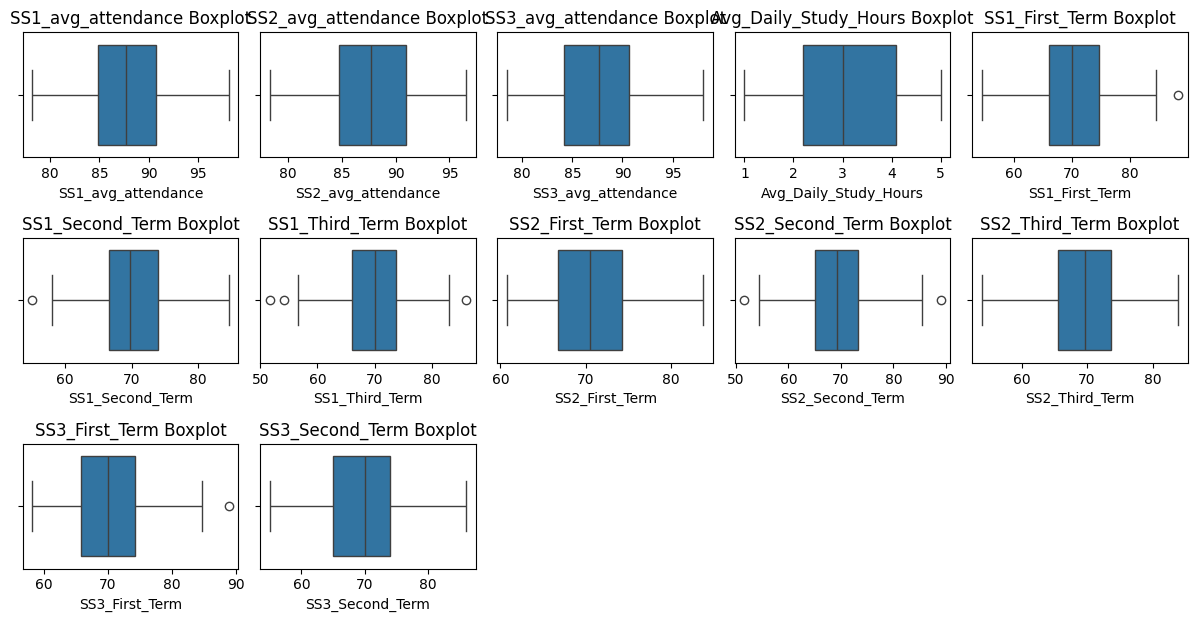

In [5]:
# boxplot for all numeric columns and subplots for each numeric column
numerical_columns = data.select_dtypes(include=[np.number])

fig, axes = plt.subplots(5, 5, figsize=(12, 10))
axes = axes.flatten()  # Flatten the axes array

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/outliers.png')
plt.show()

Since we are making use of synthetically generated data, there has been no observable outlier trend. However in the real world data, this is not usually so. 

##### Feature encoding
converting categorical variables into a numerical format that can be used by machine learning algorithms.

In [6]:
df = data.copy()

# List of columns to exclude
columns_to_exclude = ['Student_ID', 'Education_Level', 'Socioeconomic_Status', 'performance_grade']

# Select categorical columns excluding numeric types
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

categorical_columns = [col for col in categorical_columns if col not in columns_to_exclude]

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the dataset
df.head()

,Student_ID,SS1_avg_attendance,SS2_avg_attendance,SS3_avg_attendance,Access_to_Technology,Extracurricular_Activities,Private_Home_Tutor,Avg_Daily_Study_Hours,Education_Level,Socioeconomic_Status,Marriage_Status,SS1_First_Term,SS1_Second_Term,SS1_Third_Term,SS2_First_Term,SS2_Second_Term,SS2_Third_Term,SS3_First_Term,SS3_Second_Term,performance_grade
0,STD001,79.643333,81.256667,94.183333,0,1,0,4.6,BSc,High,1,83.222222,69.333333,76.444444,66.333333,62.666667,71.888889,60.000000,72.0,B2
1,STD002,85.543333,92.526667,80.306667,1,1,0,2.3,Secondary School,High,2,70.000000,69.777778,63.000000,61.333333,69.000000,70.444444,77.222222,65.0,B3
2,STD003,89.803333,96.533333,95.326667,1,1,1,1.6,PhD,Middle,0,70.444444,63.000000,75.444444,77.222222,78.777778,71.000000,70.333333,75.0,A1
3,STD004,83.196667,87.236667,89.503333,0,1,1,4.8,PhD,Middle,0,74.666667,84.555556,70.666667,68.222222,67.222222,68.000000,77.555556,60.0,C4
4,STD005,86.646667,84.816667,82.133333,1,0,0,1.1,Secondary School,Low,0,72.250000,76.375000,65.250000,69.125000,82.875000,73.750000,71.125000,80.0,A1


In [7]:
education_mapping = {
    'Primary School': 0,
    "Secondary School": 1,
    "NCE": 2,
    "HND": 3,
    "BSc": 4,
    "MSc": 5,
    'PhD': 6
}

# Perform ordinal encoding
encoder = ce.OrdinalEncoder(mapping=[{'col': 'Education_Level', 'mapping': education_mapping}])
df = encoder.fit_transform(df)

In [8]:
Status = {
    'Low': 0,
    "Middle": 1,
    "High": 2
}

# Perform ordinal encoding
encoder = ce.OrdinalEncoder(mapping=[{'col': 'Socioeconomic_Status', 'mapping': Status}])
df = encoder.fit_transform(df)

In [9]:
perf_mapping = {
    'F9': 0,
    "E8": 1,
    "D7": 2,
    "C6": 3,
    "C5": 4,
    "C4": 5,
    "B3": 6,
    "B2": 7,
    "A1": 8
}

# Perform ordinal encoding
encoder = ce.OrdinalEncoder(mapping=[{'col': 'performance_grade', 'mapping': perf_mapping}])
df = encoder.fit_transform(df)

##### Scaling
Scaling the numerical columns in our dataset is a crucial preprocessing step to enhance the model performance and improves interpretability to perform optimal machine learning model.

In [10]:
# Scale the numerical features
scaler = StandardScaler()

# Fit and transform the data
df[numerical_columns.columns] = scaler.fit_transform(df[numerical_columns.columns])

# Display the first few rows of the dataset after scaling
df.head()

,Student_ID,SS1_avg_attendance,SS2_avg_attendance,SS3_avg_attendance,Access_to_Technology,Extracurricular_Activities,Private_Home_Tutor,Avg_Daily_Study_Hours,Education_Level,Socioeconomic_Status,Marriage_Status,SS1_First_Term,SS1_Second_Term,SS1_Third_Term,SS2_First_Term,SS2_Second_Term,SS2_Third_Term,SS3_First_Term,SS3_Second_Term,performance_grade
0,STD001,-1.831376,-1.576198,1.452713,0,1,0,1.360037,4,2,1,2.025281,-0.146271,1.120603,-0.847917,-1.016533,0.378622,-1.669796,0.340614,7
1,STD002,-0.485573,1.118801,-1.678956,1,1,0,-0.667895,1,2,2,-0.057385,-0.062818,-1.164993,-1.837042,-0.044587,0.143704,1.080437,-0.774847,6
2,STD003,0.486143,2.076917,1.710739,1,1,1,-1.285092,6,1,0,0.012620,-1.335472,0.950600,1.306177,1.455960,0.234057,-0.019656,0.818668,8
3,STD004,-1.020852,-0.146198,0.396536,0,1,1,1.536379,6,1,0,0.677673,2.711986,0.138364,-0.474248,-0.317414,-0.253850,1.133667,-1.571604,5
4,STD005,-0.233900,-0.724894,-1.266716,1,0,0,-1.725947,1,0,0,0.297018,1.175934,-0.782486,-0.295656,2.084741,0.681305,0.106766,1.615426,8


#### 3. FEATURE SELECTION
Feature selection is used to improve model performance by removing irrelevant features and selecting the most important features.



Checking features variance

Using variance threshold which is a simple baseline approach to feature selection to potentially reduce the features in numerical columns.

In [11]:
# Calculate and print the variance of all features
variances = numerical_columns.var().sort_values()
print(variances)

Avg_Daily_Study_Hours     1.294409
SS2_avg_attendance       17.597605
SS1_avg_attendance       19.340328
SS3_avg_attendance       19.757931
SS2_First_Term           25.713463
SS1_Second_Term          28.541478
SS1_Third_Term           34.818448
SS2_Third_Term           38.044428
SS3_First_Term           39.460487
SS3_Second_Term          39.628774
SS1_First_Term           40.559455
SS2_Second_Term          42.727116
dtype: float64


The variance scores displayed here indicate the extent of data dispersion or spread around the mean for each variable. With the low variance is typically considered to be than 0.1, the features here mostly exhibit high variance which means they contribute significantly to a model's complexity and interpretability.

Removing SS3_Second_Term ans student_ID column

By removing SS3_Second_Term variable from our dataset, we avoiding data leakage and ensuring model validity when predicting performance grades which helps in building a more robust and realistic model.

In [12]:
# Removing SS3_Second_Term column
df.drop('SS3_Second_Term', axis=1, inplace=True)

In [13]:
# Removing Student_ID column
df.drop('Student_ID', axis=1, inplace=True)

Feature Importance

Feature importance can help us in making decisions about which features to include in our model, leading to better performance and efficiency.

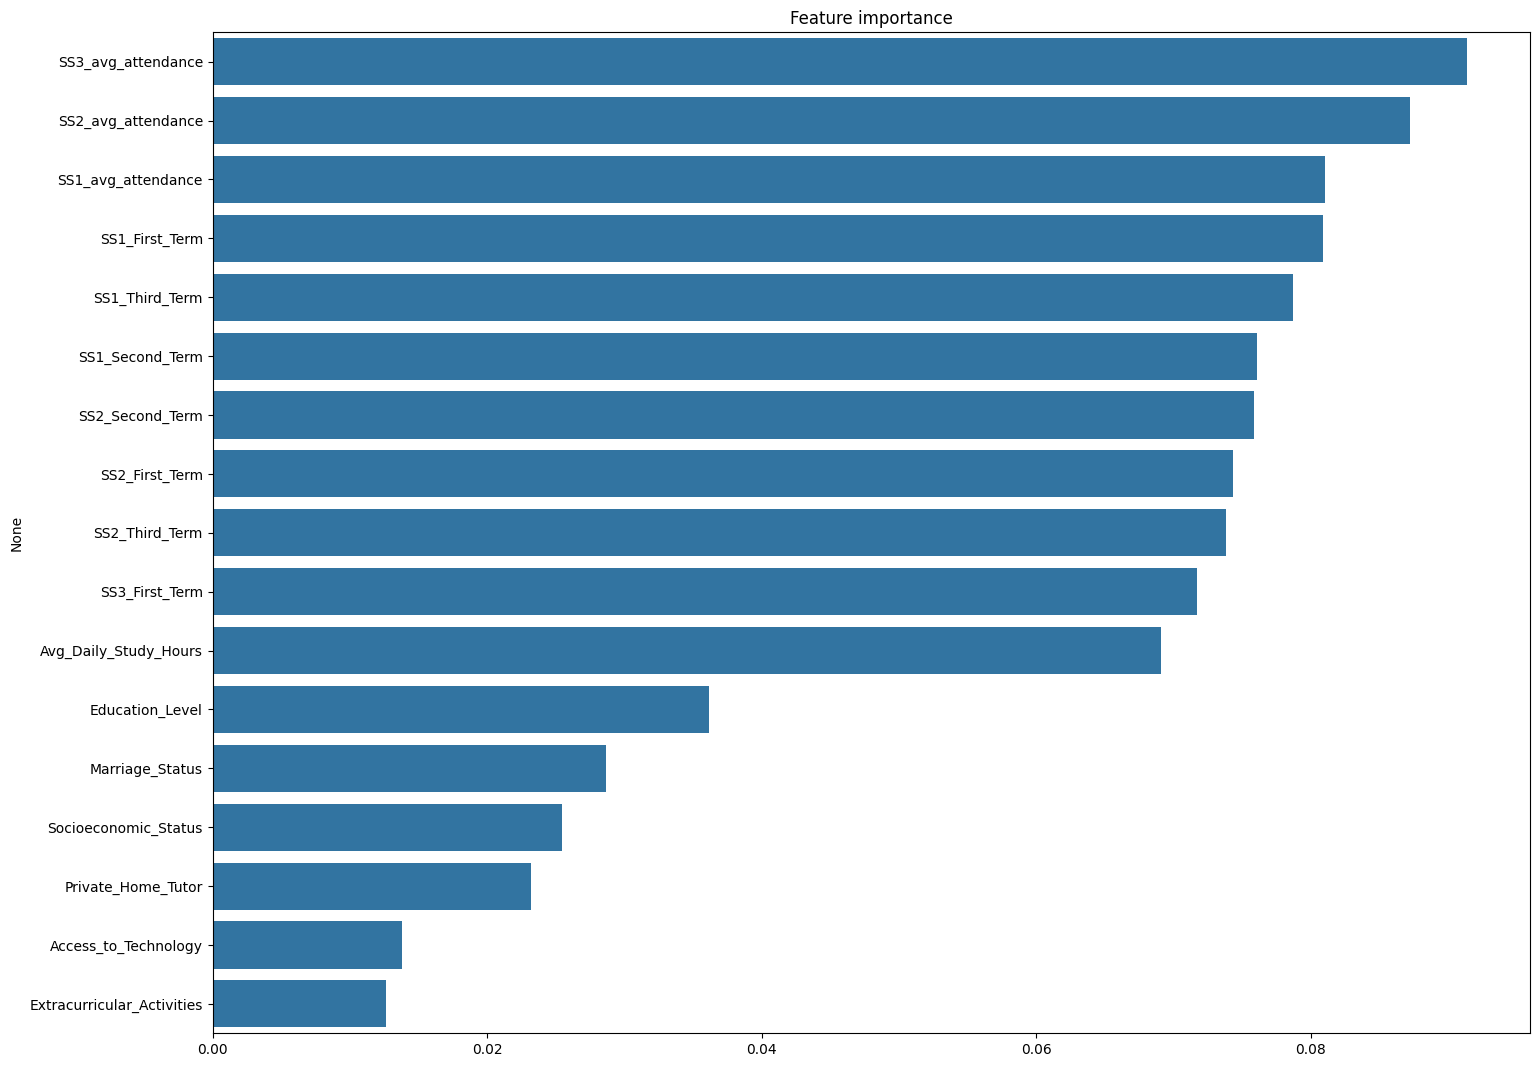

In [14]:
# Feature importance using random forest
X = df.drop(columns=['performance_grade'])
y = df['performance_grade']

rf = RandomForestClassifier(random_state=42)
clf = rf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(17,13))
plt.title("Feature importance")
plt.savefig('images/Feature_importance')
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

From the results of feature importance, we can ideally choose top 16 most importance features based on our results.

In [15]:
# Choose the top 18 features
top_features = fimp[:16].index.tolist()

# create a new dataframe with the top 18 features and the target variable
df_top = df[top_features + ['performance_grade']]
df_top.head()

,SS3_avg_attendance,SS2_avg_attendance,SS1_avg_attendance,SS1_First_Term,SS1_Third_Term,SS1_Second_Term,SS2_Second_Term,SS2_First_Term,SS2_Third_Term,SS3_First_Term,Avg_Daily_Study_Hours,Education_Level,Marriage_Status,Socioeconomic_Status,Private_Home_Tutor,Access_to_Technology,performance_grade
0,1.452713,-1.576198,-1.831376,2.025281,1.120603,-0.146271,-1.016533,-0.847917,0.378622,-1.669796,1.360037,4,1,2,0,0,7
1,-1.678956,1.118801,-0.485573,-0.057385,-1.164993,-0.062818,-0.044587,-1.837042,0.143704,1.080437,-0.667895,1,2,2,0,1,6
2,1.710739,2.076917,0.486143,0.012620,0.950600,-1.335472,1.455960,1.306177,0.234057,-0.019656,-1.285092,6,0,1,1,1,8
3,0.396536,-0.146198,-1.020852,0.677673,0.138364,2.711986,-0.317414,-0.474248,-0.253850,1.133667,1.536379,6,0,1,1,0,5
4,-1.266716,-0.724894,-0.233900,0.297018,-0.782486,1.175934,2.084741,-0.295656,0.681305,0.106766,-1.725947,1,0,0,0,1,8


#### 4. MODEL BUILDING 
This will be carried out using three usually commonly used algorithms: Random forest, Neural network and SVM.

In [16]:
# Split the data into training and testing sets
X = df_top.drop(columns=['performance_grade'])
y = df_top['performance_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance on the training set using SMOTE
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)

Training Models

LR: 0.447619 (0.088320)
KNN: 0.495238 (0.057143)
CART: 0.509524 (0.090476)
SVM: 0.638095 (0.080249)
RF: 0.633333 (0.095357)
NB: 0.495238 (0.068014)


c:\Users\DELL\Documents\KAIZEN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\Documents\KAIZEN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\Documents\KAIZEN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\Documents\KAIZEN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\Documents\

MLP: 0.600000 (0.083027)


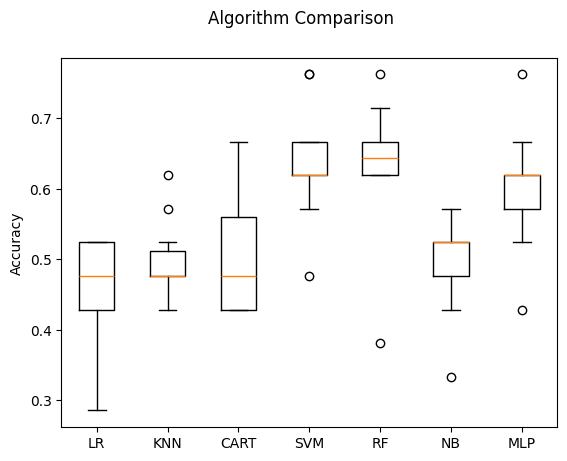

In [17]:
#Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))  # Logistic Regression
models.append(('KNN', KNeighborsClassifier()))  # KNN for Classification
models.append(('CART', DecisionTreeClassifier()))  # Decision Tree for Classification
models.append(('SVM', SVC(gamma='auto')))  # Support Vector Machine
models.append(('RF', RandomForestClassifier()))  # Random Forest
models.append(('NB', GaussianNB()))  # Naive Bayes
models.append(('MLP', MLPClassifier()))  # Multi-layer Perceptron/ Neural Network

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})"
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.savefig('images/algorithm_perf')
plt.show()

Key Insights:  
SVM and RF are the top-performing models with consistent and high accuracy.  
MLP shows potential but with high variability in performance.  
LR and NB are weaker performers for this task, with lower median accuracies and higher variability.  
CART and KNN offer moderate performance but could be considered depending on the trade-offs between complexity and consistency.

Model Selection

In [18]:
# Make predictions on validation dataset with the best model (SVM)
# Training the model
model = SVC(gamma='auto', random_state = 42)
model.fit(X_train, y_train)


SVC(gamma='auto', random_state=42)

##### 5. EVALUATION

Accuracy: 0.3125
Mean Squared Error: 2.6875
Root Mean Squared Error: 1.6393596310755
Mean Absolute Error: 1.25
R^2: -1.3888888888888888
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         7
           6       0.20      0.11      0.14         9
           7       0.46      0.67      0.55         9
           8       0.33      0.43      0.38         7

    accuracy                           0.31        32
   macro avg       0.25      0.30      0.27        32
weighted avg       0.26      0.31      0.28        32



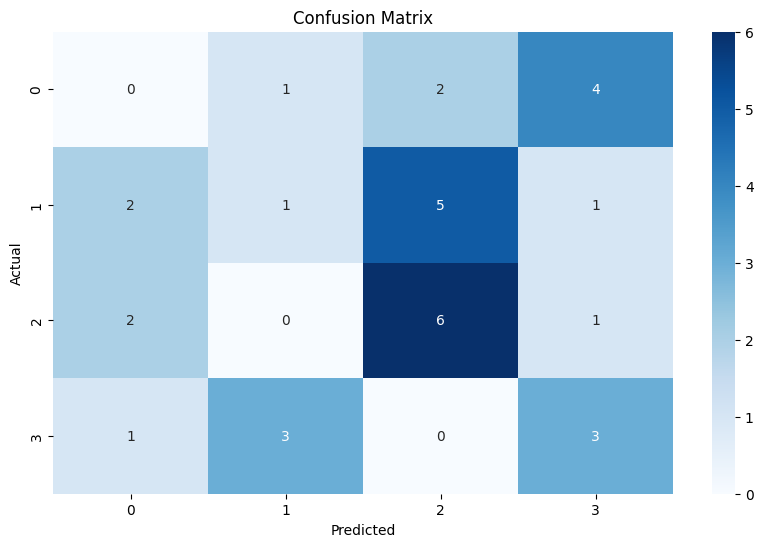

In [19]:
# Predict the exam scores on validation data
predictions = model.predict(X_test)

# print the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R^2:', r2)

# Classification Report
print(classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix')
plt.show()

In [20]:
# Save the model to a file
joblib.dump(model, 'prediction_model.pkl')

['prediction_model.pkl']